# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [2]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [3]:
env = UnityEnvironment(file_name="D:/DRL/deep-reinforcement-learning-master/p3_collab-compet/Tennis_Windows_x86_64/Tennis_Windows_x86_64/Tennis.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [5]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Score (max over agents) from episode 1: 0.09000000171363354
Score (max over agents) from episode 2: 0.0
Score (max over agents) from episode 3: 0.10000000149011612
Score (max over agents) from episode 4: 0.0
Score (max over agents) from episode 5: 0.0


When finished, you can close the environment.

In [6]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

## MADDPG

I will try a multi agent Deep Deterministic Policy Gradient approach. Therefore the DDPG agent from the previous project will be adjusted to learn in a multi agent environment, in which agents act on a shared environment.

In [1]:
from unityagents import UnityEnvironment
import numpy as np

#multiple agents
env = UnityEnvironment(file_name="D:/DRL/deep-reinforcement-learning-master/p3_collab-compet/Tennis_Windows_x86_64/Tennis_Windows_x86_64/Tennis.exe")
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


In [2]:
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from mddpg_agent import Actor, Critic, OUNoise, ReplayBuffer

### Init agent

In [3]:
# environment information
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]
# number of agents in the environment
n_agents = len(env_info.agents)
print('Number of agents:', n_agents)
# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)
# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like: ', states[0])

#device to put NN into memory
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# hyperparameters
BATCH_SIZE = 128        # minibatch size / Learning will occur with a batch of 128
GAMMA = 0.99            # discount: discounting of future rewards
BUFFER_SIZE = int(1e6)  # replay buffer size
TAU = 1e-1              # soft update factor for target NN (fixed Q-targets)
LR_ACTOR = 1e-4         # learning rate actor optimizer
LR_CRITIC = 1e-4        # learning rate critic optimizer
WEIGHT_DECAY = 0        # L2 weight decay: L2 regularization against overfitting: not used here
ADD_NOISE = True        #add OUNoise to increase exploration
SEED = 2                # random seed

#init OU noise in shape action_Size with random seed
noise = OUNoise(action_size, 2)

#init buffer to store experience tuples SARS: Experience Replay
memory = ReplayBuffer(device, action_size, BUFFER_SIZE, BATCH_SIZE, SEED)

#AGent ID
ACTOR_0_Number = 0
ACTOR_1_Number = 1

#initialize one Actor object from ACTOR class. This object has the actor NN, act, step function
actor_0 = Actor(device, ACTOR_0_Number, state_size, action_size, SEED, memory, noise, LR_ACTOR, WEIGHT_DECAY)
actor_1 = Actor(device, ACTOR_1_Number, state_size, action_size, SEED, memory, noise, LR_ACTOR, WEIGHT_DECAY)

#initialize the Critic object. We only need 1 critic object. It has critic NN , step, learn, soft_update functions
critic = Critic(device, state_size, action_size, SEED, GAMMA, TAU, LR_CRITIC, WEIGHT_DECAY)


Number of agents: 2
Number of actions: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like:  [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### Train the agent

HMM das ist eigentlich schon ein MULTI-Agent DDPG programm... Unterschied zum "Continuous control" ist wohl, dass hier das Environment bei einer action eines agents, sich fuer alle agents aendert. Somit sollte das auch so schon funktionieren... mal sehen

Episode 0	Average Score: 0.00Current Score: [ 0.   -0.01]
Episode 0	Average Score: 0.00
Episode 1	Average Score: 0.00Current Score: [ 0.   -0.01]


C:\Users\Mir\Desktop\Jupyter_temp\deep-reinforcement-learning-master\p3_collab-compet\mddpg_agent.py:131: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(self.local.parameters(), 1) #gradient clipping


Episode 2	Average Score: 0.03Current Score: [-0.01  0.1 ]
Episode 3	Average Score: 0.03Current Score: [ 0.   -0.01]
Episode 4	Average Score: 0.02Current Score: [ 0.   -0.01]
Episode 5	Average Score: 0.02Current Score: [-0.01  0.  ]
Episode 6	Average Score: 0.01Current Score: [ 0.   -0.01]
Episode 7	Average Score: 0.01Current Score: [-0.01  0.  ]
Episode 8	Average Score: 0.01Current Score: [ 0.   -0.01]
Episode 9	Average Score: 0.01Current Score: [ 0.   -0.01]
Episode 10	Average Score: 0.01Current Score: [ 0.   -0.01]
Episode 11	Average Score: 0.01Current Score: [ 0.   -0.01]
Episode 12	Average Score: 0.01Current Score: [ 0.   -0.01]
Episode 13	Average Score: 0.01Current Score: [ 0.   -0.01]
Episode 14	Average Score: 0.01Current Score: [ 0.   -0.01]
Episode 15	Average Score: 0.01Current Score: [ 0.   -0.01]
Episode 16	Average Score: 0.01Current Score: [-0.01  0.  ]
Episode 17	Average Score: 0.01Current Score: [-0.01  0.  ]
Episode 18	Average Score: 0.01Current Score: [-0.01  0.  ]
Episo

Episode 141	Average Score: 0.05Current Score: [-0.01  0.1 ]
Episode 142	Average Score: 0.05Current Score: [ 0.1  -0.01]
Episode 143	Average Score: 0.05Current Score: [ 0.1  -0.01]
Episode 144	Average Score: 0.05Current Score: [ 0.1  -0.01]
Episode 145	Average Score: 0.05Current Score: [ 0.1  -0.01]
Episode 146	Average Score: 0.06Current Score: [0.3  0.19]
Episode 147	Average Score: 0.06Current Score: [0.2  0.09]
Episode 148	Average Score: 0.06Current Score: [-0.01  0.  ]
Episode 149	Average Score: 0.06Current Score: [ 0.   -0.01]
Episode 150	Average Score: 0.06Current Score: [-0.01  0.1 ]
Episode 151	Average Score: 0.06Current Score: [-0.01  0.  ]
Episode 152	Average Score: 0.06Current Score: [-0.01  0.1 ]
Episode 153	Average Score: 0.06Current Score: [ 0.1  -0.01]
Episode 154	Average Score: 0.06Current Score: [ 0.1  -0.01]
Episode 155	Average Score: 0.06Current Score: [ 0.1  -0.01]
Episode 156	Average Score: 0.06Current Score: [ 0.1  -0.01]
Episode 157	Average Score: 0.06Current Score

Episode 279	Average Score: 0.14Current Score: [-0.01  0.  ]
Episode 280	Average Score: 0.14Current Score: [ 0.1  -0.01]
Episode 281	Average Score: 0.14Current Score: [-0.01  0.  ]
Episode 282	Average Score: 0.14Current Score: [0.1  0.09]
Episode 283	Average Score: 0.14Current Score: [ 0.1  -0.01]
Episode 284	Average Score: 0.14Current Score: [ 0.   -0.01]
Episode 285	Average Score: 0.14Current Score: [0.09 0.2 ]
Episode 286	Average Score: 0.15Current Score: [0.79000001 0.90000001]
Episode 287	Average Score: 0.15Current Score: [0.   0.09]
Episode 288	Average Score: 0.15Current Score: [0.1  0.09]
Episode 289	Average Score: 0.15Current Score: [ 0.1  -0.01]
Episode 290	Average Score: 0.15Current Score: [0.1  0.09]
Episode 291	Average Score: 0.15Current Score: [-0.01  0.  ]
Episode 292	Average Score: 0.15Current Score: [0.39000001 0.3       ]
Episode 293	Average Score: 0.15Current Score: [ 0.1  -0.01]
Episode 294	Average Score: 0.15Current Score: [-0.01  0.1 ]
Episode 295	Average Score: 0.1

Episode 412	Average Score: 0.33Current Score: [0.29 0.3 ]
Episode 413	Average Score: 0.34Current Score: [0.89000001 1.10000002]
Episode 414	Average Score: 0.34Current Score: [0.2  0.19]
Episode 415	Average Score: 0.34Current Score: [ 0.1  -0.01]
Episode 416	Average Score: 0.34Current Score: [0.70000001 0.59000001]
Episode 417	Average Score: 0.35Current Score: [0.60000001 0.49000001]
Episode 418	Average Score: 0.36Current Score: [1.20000002 1.09000002]
Episode 419	Average Score: 0.36Current Score: [0.59000001 0.60000001]
Episode 420	Average Score: 0.37Current Score: [0.80000001 0.79000001]
Episode 421	Average Score: 0.37Current Score: [0.40000001 0.49000001]
Episode 422	Average Score: 0.37Current Score: [ 0.1  -0.01]
Episode 423	Average Score: 0.38Current Score: [1.49000002 1.50000002]
Episode 424	Average Score: 0.39Current Score: [0.69000001 0.80000001]
Episode 425	Average Score: 0.39Current Score: [0.   0.09]
Episode 426	Average Score: 0.39Current Score: [0.2  0.19]
Episode 427	Averag

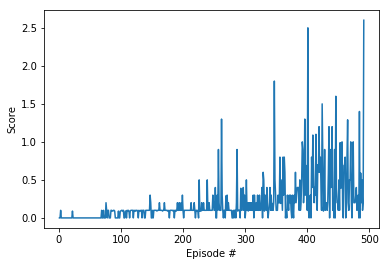

In [4]:
def mddpg(n_episodes=2000, print_every=100):
    scores = []
    
    scores_deque = deque(maxlen=print_every)
    

    for episode in range(n_episodes):
        env_info = env.reset(train_mode=True)[brain_name]            # reset environment
        states = env_info.vector_observations                        # get starting states
        actor_0.reset()                                              # reset the agent noise
        actor_1.reset()                                              
                                              
        score = np.zeros(n_agents)
        
        while True:
            action_0 = actor_0.act(states[ACTOR_0_Number], ADD_NOISE)#predict actions using current actor NN (local NN is used)
            action_1 = actor_1.act(states[ACTOR_1_Number], ADD_NOISE)#predict actions of second agent using current actor NN (local NN is used)
            actions = np.concatenate((action_0, action_1)) #add actions together
        
            env_info = env.step(actions)[brain_name]              # act on environment to move a timestep ahead                           
            next_states = env_info.vector_observations               # get state from environment since its now in next state        
            rewards = env_info.rewards                               # rewards for both agents       
            dones = env_info.local_done                              # check if any of the agents is "done"       

            #learning step preparation: add SARS tuple to experience replay buffer
            actor_0.step(states[ACTOR_0_Number], action_0, rewards[ACTOR_0_Number], next_states[ACTOR_0_Number], dones[ACTOR_0_Number])
            actor_1.step(states[ACTOR_1_Number], action_1, rewards[ACTOR_1_Number], next_states[ACTOR_1_Number], dones[ACTOR_1_Number])
            
            #actual learning step, in which the individual actor, that was passed along is trained, together with the critic
            critic.step(actor_0, memory)
            critic.step(actor_1, memory)

            score += rewards       # update total score in this episode     
            states = next_states   # prepare for next time sequence        
                                                        
            if np.any( dones ):    # break if any agent is done       
                break                                        

        

        scores.append(np.max(score))
        scores_deque.append(np.max(score))
        
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(episode, np.mean(scores_deque)), end="")
        print('Current Score: ' + str(score))
        torch.save(actor_0.target.state_dict(), 'checkpoint_actor_0.pth')
        torch.save(actor_1.target.state_dict(), 'checkpoint_actor_1.pth')
        torch.save(critic.target.state_dict(), 'checkpoint_critic.pth')
        if episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(episode, np.mean(scores_deque)))
            
        if np.mean(scores_deque) >= 0.5: #mean of last 100 scores above 0.5: solved
            print('\nEnvironment solved after {:d} episodes!\tMean Score: {:.2f}'.format(episode, np.mean(scores_deque)))
            break   

    plt.plot(np.arange(1, len(scores)+1), scores)
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.show()    


# train the agent
mddpg()